In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import load_data as ld
import seaborn as sns
import geopandas as gpd

dir_data = "C:\\Users\\nicol\\Data\\kaggle\\"

dict_data = ld.load_data_kagg(dir_data)



C:\Users\nicol\git\projet-accidents-routiers\load_data.py:313: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_dict = { 'caract'  : pd.read_csv(folder_path + 'caracteristics.csv', sep=',', encoding='ISO-8859-1'),
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:314: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  'lieux'    : pd.read_csv(folder_path + 'places.csv', sep=','),


In [2]:
df_caract = dict_data['caract']
df_lieux = dict_data['lieux']
df_usagers = dict_data['usagers']
df_vacances = dict_data['vacances']
df_vehic = dict_data['vehic']

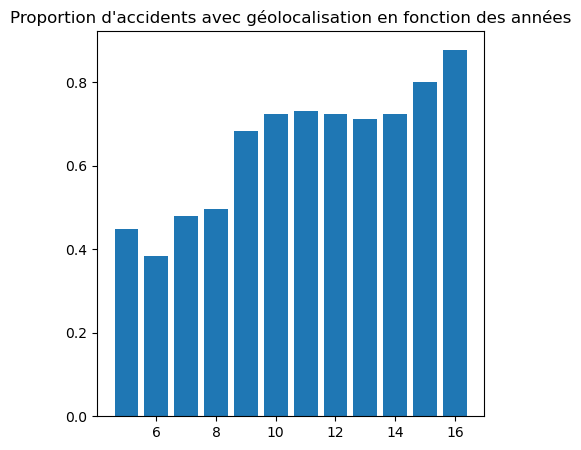

In [3]:
# df_caract.head()

# df_caract.info()
# très peu de Null dans les données météo 
# moins de la moitié des accidents ont les coordonnées gpd renseignées
# mais la proportion d'accidents avec coordonées gps augmente avec les années

null_lat = lambda lat : lat[(lat == 0) | (lat.isnull())].count()

df_stats_lat_null = df_caract.groupby('an').agg(lat_count=('lat', 'count'), lat_null_count=('lat',null_lat))
df_stats_lat_null['lat_null_propor'] = df_stats_lat_null.lat_null_count / df_stats_lat_null.lat_count

df_stats_lat_null

fig = plt.figure(figsize=(5,5))
plt.bar(df_stats_lat_null.index, 1-df_stats_lat_null.lat_null_propor)
plt.title("Proportion d'accidents avec géolocalisation en fonction des années");


# 

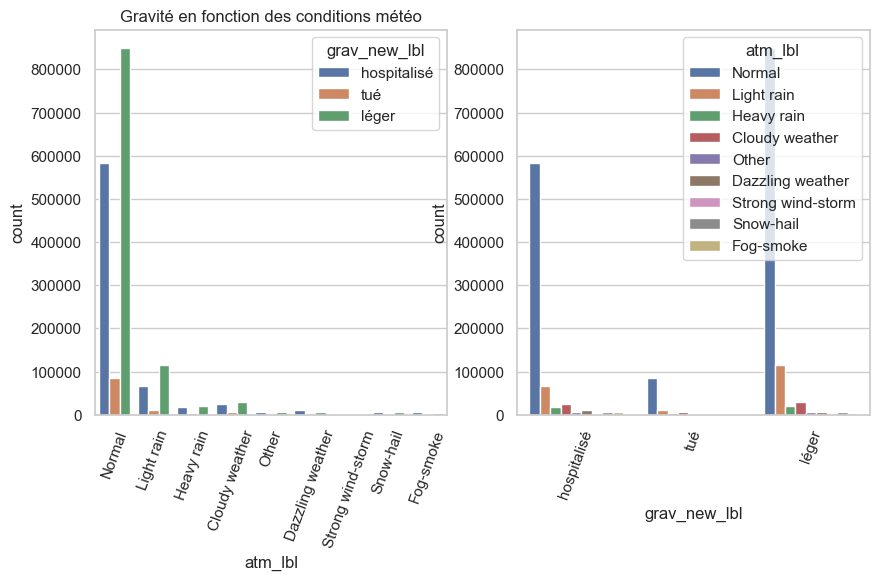

In [84]:
usagers_caract =  df_usagers.merge(right=df_caract, on='Num_Acc', how='left')

# # check dimensions
# print(df_usagers.shape)
# print(df_caract.shape)
# print(usagers_caract.shape)

# on recode les gravités 
# 1 : non renséigné -> 0
# 2 : tué           -> 3  
# 3 : hospitalisé   -> 2
# 4 : léger         -> 1
usagers_caract['grav_new'] = usagers_caract['grav'].replace([1, 2, 3, 4], [0, 3, 2, 1])

# gravité vs météo ('atm')
df = usagers_caract[['Num_Acc', 'grav_new']]
df = df.groupby('Num_Acc').agg({'grav_new':'max'})
df = df.merge(right=usagers_caract[['Num_Acc', 'atm']], on='Num_Acc', how='left')
df['grav_new_lbl'] = df['grav_new'].replace([0, 1, 2, 3], ['non renseigné', 'léger', 'hospitalisé', 'tué'])
df['atm_lbl'] = df['atm'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9], 
                                       ['Normal', 'Light rain', 'Heavy rain', 'Snow-hail', 'Fog-smoke', 'Strong wind-storm',
                                        'Dazzling weather', 'Cloudy weather', 'Other'])


import seaborn as sns
sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

sns.countplot(x=df.atm_lbl, hue=df.grav_new_lbl, ax=ax1);
ax1.set_xticklabels(rotation=70, labels=ax1.get_xticklabels())
ax1.set_title('Gravité en fonction des conditions météo')

sns.countplot(x=df.grav_new_lbl, hue=df.atm_lbl, ax=ax2)
ax2.set_xticklabels(rotation=70, labels=ax2.get_xticklabels())
ax1.set_title('Gravité en fonction des conditions météo');